In [1]:
# Importing our Machine Learning libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading our California housing price dataset csv file into pandas Dataframe
CA_house_data = pd.read_csv('housing.csv')


In [3]:
# Looking at our housing data
CA_house_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# This function checks for null values within our data and removes/drops rows that contains them
HOUSING_DATAFRAME = CA_house_data
def null_row_remover(housing_dataframe= HOUSING_DATAFRAME):
    housing_dataframe.dropna(inplace= True)

null_row_remover()


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

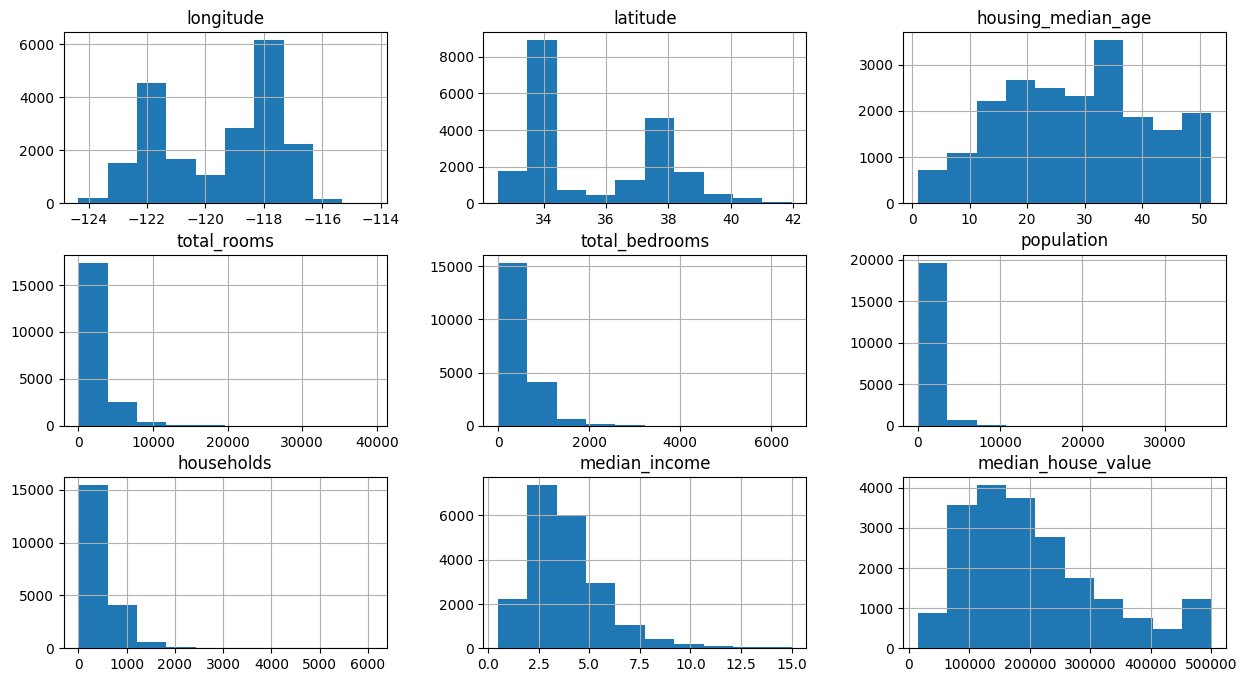

In [5]:
# Exploring the visual distribution of the individual numerical columns
CA_house_data.hist(figsize= (15, 8))


<Axes: >

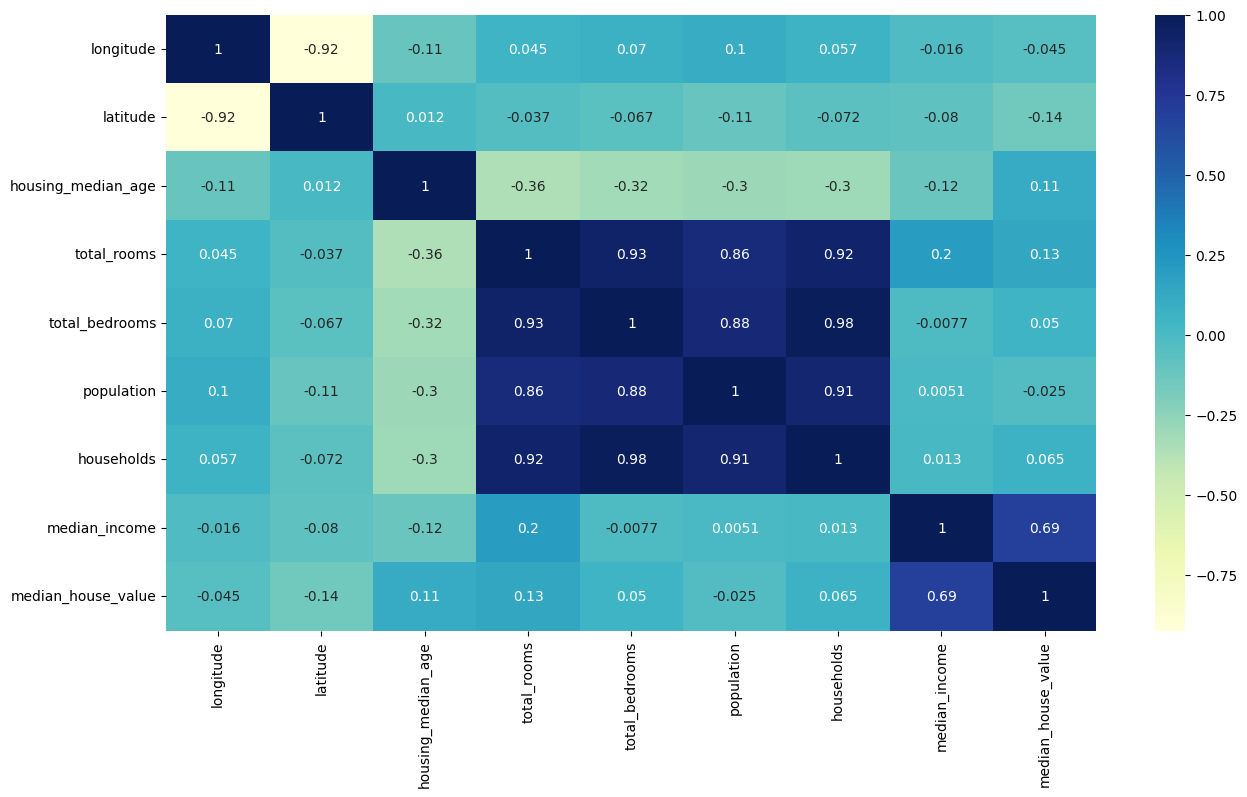

In [6]:
# Using a heatmap to visualize the correlation matrix of the feature variables with our target 
# variable - "median_house_value"
plt.figure(figsize=(15, 8))
sns.heatmap(CA_house_data.corr(numeric_only= True), annot= True, cmap="YlGnBu")

In [7]:
# This function deals with preprocessing some of our feature variables so that their distribution is not skewed 
# to the right or left in order that it is normalized
FEAT_1 = 'total_rooms'
FEAT_2 = 'total_bedrooms'
FEAT_3 = 'population'
FEAT_4 = 'households'
def feature_preprocessor(feat_1=FEAT_1, feat_2=FEAT_2, feat_3=FEAT_3, feat_4=FEAT_4):
    CA_house_data[feat_1] = np.log(CA_house_data[feat_1] + 1)
    CA_house_data[feat_2] = np.log(CA_house_data[feat_2] + 1)
    CA_house_data[feat_3] = np.log(CA_house_data[feat_3] + 1)
    CA_house_data[feat_4] = np.log(CA_house_data[feat_4] + 1)

feature_preprocessor()


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

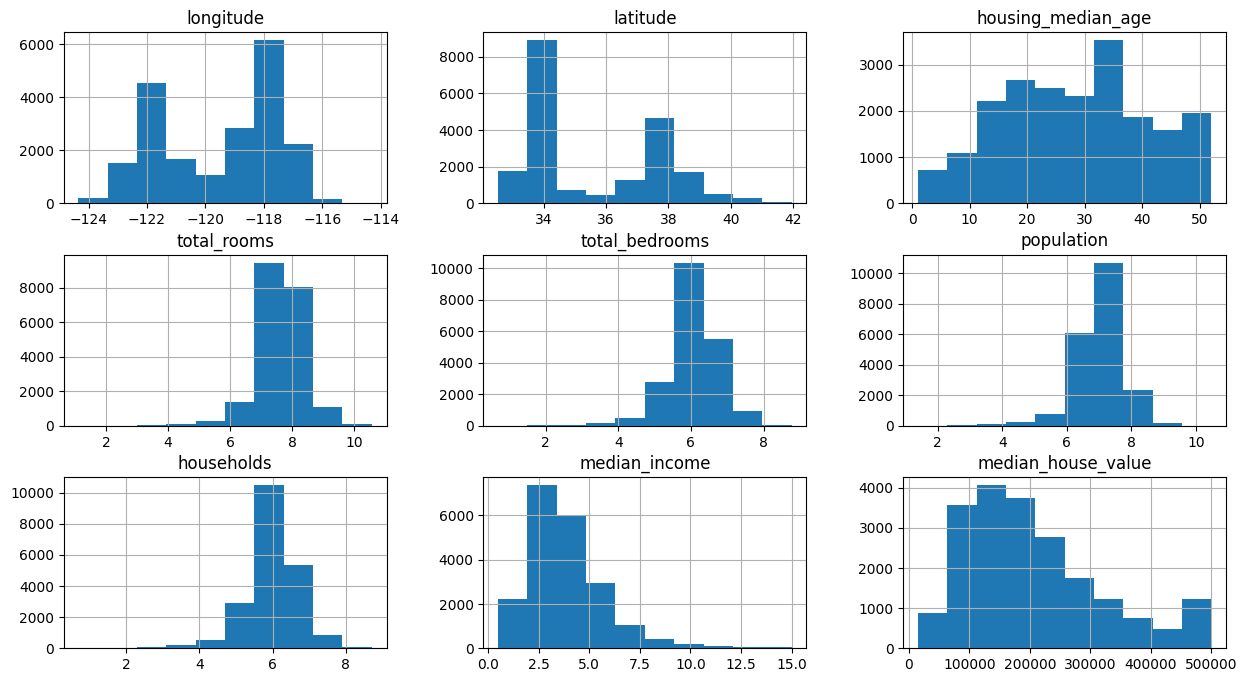

In [8]:
# Inspecting the distribution of our columns again to make sure it was normalized
CA_house_data.hist(figsize= (15, 8))


In [9]:
# The "ocean_proximity" variable would be useful, so we're going to convert it from text to numerical data using 
# pandas One-hot encoding method so that it can be fed into our ML model 
CA_house_data = CA_house_data.join(pd.get_dummies(CA_house_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)


In [10]:
# We engineering new custom features that are more closely correlated to our target variable 
CA_house_data['bedroom_ratio'] = CA_house_data['total_bedrooms'] / CA_house_data['total_rooms']
CA_house_data['household_rooms'] = CA_house_data['total_rooms'] / CA_house_data['households']


In [11]:
CA_house_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0,0.799078,1.285243


<Axes: >

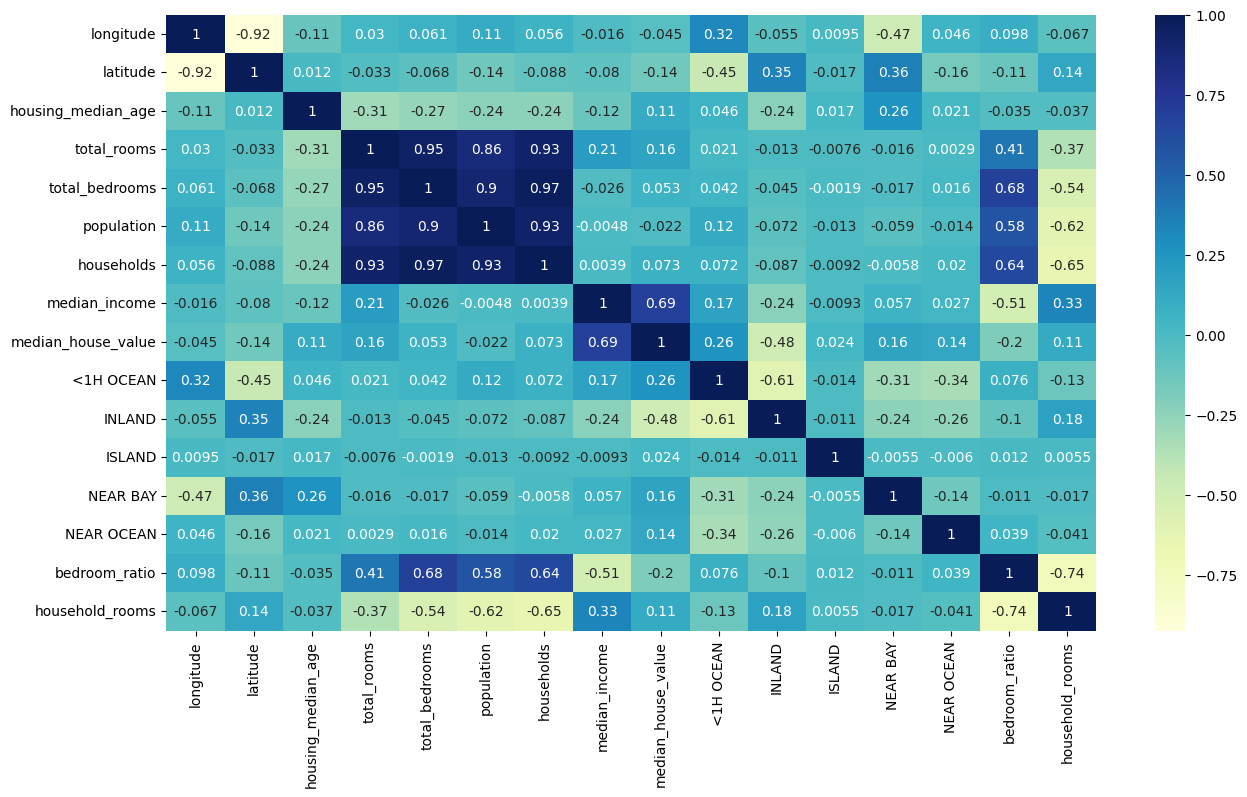

In [12]:
# Looking at how the new features correlate with the target variable in the heatmap correlation matrix 
plt.figure(figsize=(15, 8))
sns.heatmap(CA_house_data.corr(numeric_only= True), annot= True, cmap="YlGnBu")


<Axes: xlabel='longitude', ylabel='latitude'>

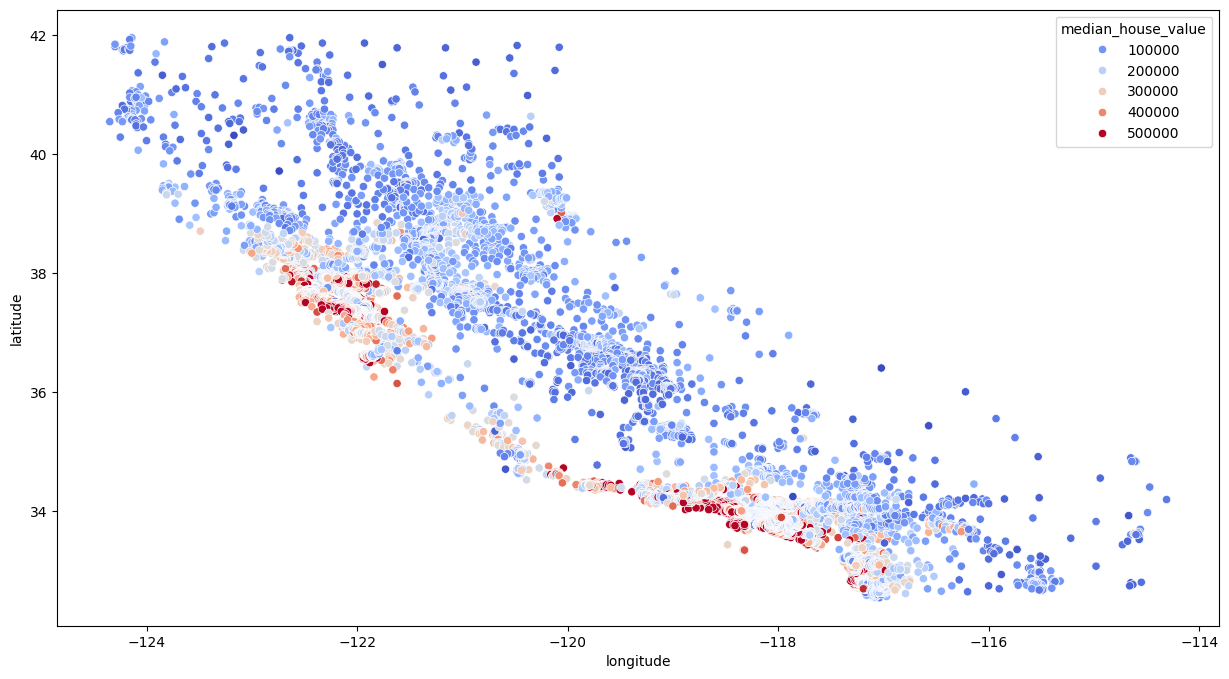

In [13]:
# Using a scatterplot diagram to see how the proximity to the ocean and the position of the individual blocks
# influences the housing price
plt.figure(figsize=(15, 8))
sns.scatterplot(x= "longitude", y= "latitude", hue= "median_house_value", data= CA_house_data, palette= "coolwarm")


In [31]:
# Importing scikit-learn library
from sklearn.model_selection import train_test_split

# Splitting our data into training and testing data
X = CA_house_data.drop(['median_house_value'], axis=1)
y = CA_house_data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [32]:
# Scaling the training and testing input data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


In [33]:
# Training a simple linear regression ML model with our training feature and target variables
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_scaled, y_train)


LinearRegression()

In [34]:
# Evaluating the performance of the Linear Regressor model
reg.score(X_test_scaled, y_test)


0.6731985348687319

In [37]:
# Training a Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)


RandomForestRegressor()

In [38]:
# Evaluating the accuracy of our Random Forest Regressor
forest.score(X_test_scaled, y_test)


0.8204170811630658

In [51]:
# Using grid search to find the optimal hyperparameter 
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring= "neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
best_forest = grid_search.best_estimator_
best_forest.score(X_test_scaled, y_test)


0.8212537127753683